In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn                                      # import all library  

from warnings import filterwarnings
filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve, auc

In [3]:
plt.rcParams["figure.figsize"]=[10,7]     # default all visualization in [10,7]

### DATA COLLECTION

In [7]:
data = pd.read_csv(r"C:\Users\admin\Downloads\breast_cancer_data.csv")
data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


### DATA ALALYSING

In [9]:
data.shape

(569, 31)

Text(0.5, 1.0, 'visualizing the all null values data')

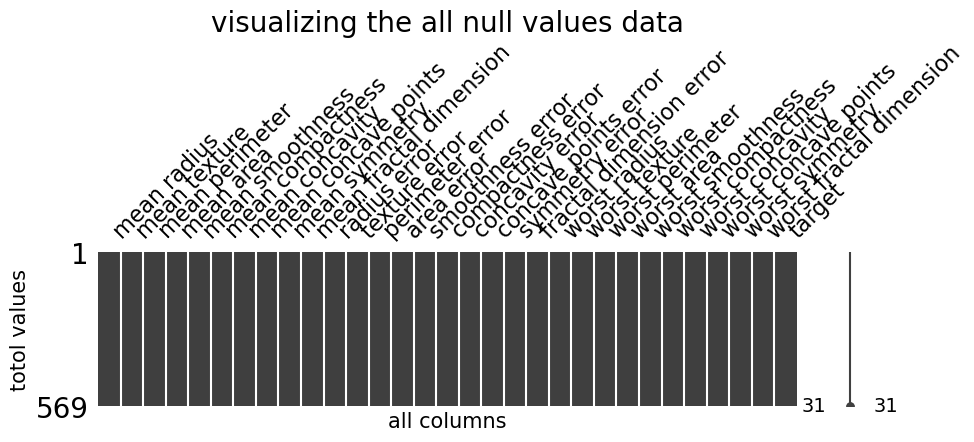

In [10]:
import missingno as mn
mn.matrix(data,figsize=(10,2))
plt.xlabel("all columns",fontdict={"fontsize":15})
plt.ylabel("totol values",fontdict={"fontsize":15})
plt.title("visualizing the all null values data",fontdict={"fontsize":20})

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [12]:
cou = data.target.value_counts().reset_index()
cou.columns = ["target","counts"]
cou 

,target,counts
0,1,357
1,0,212


### DATA VISUALIZATION OF TARGET VALUE

Text(0.5, 1.0, 'visualizing the target total values ')

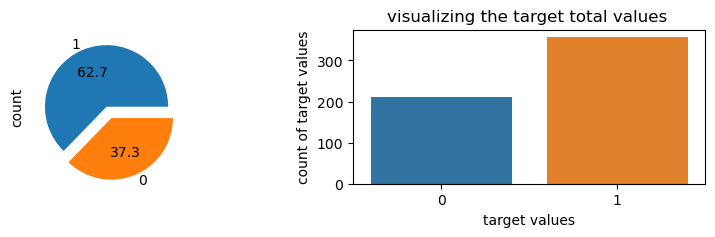

In [15]:
plt.figure(figsize=[10,2])
plt.subplot(1,2,1)
data.target.value_counts().plot(kind="pie",autopct="%.1f",explode=[0,0.2])
plt.subplot(1,2,2)
sn.barplot(x="target",y="counts",data = cou)
plt.xlabel("target values")
plt.ylabel("count of target values")
plt.title("visualizing the target total values ")

In [16]:
x = data.drop(["target"],axis=1)
y = data.target

### DATA TRAINING AND TESTING

In [21]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state = 42)

In [22]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

Text(0.5, 1.0, 'correlation_heatmap')

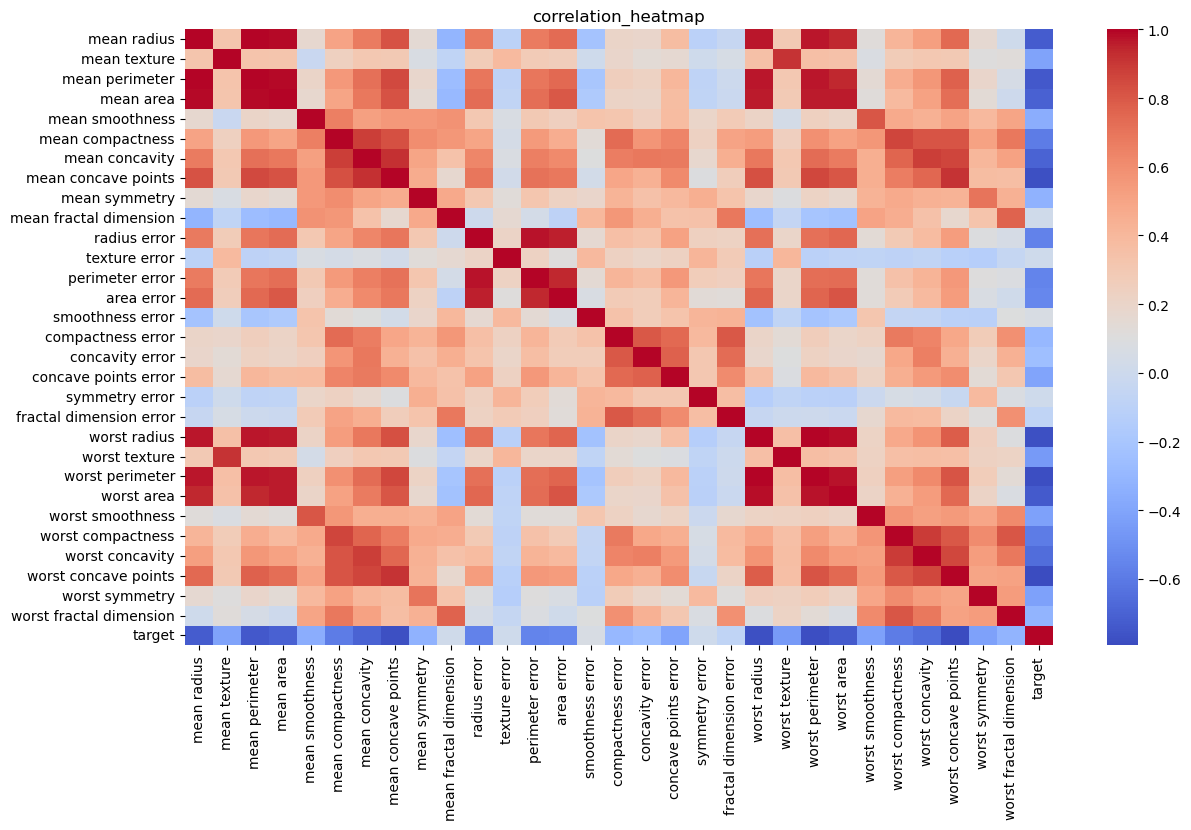

In [19]:
corr_matrix = data.corr()
plt.figure(figsize=(14,8))
sn.heatmap(corr_matrix,annot=False,cmap = "coolwarm")
plt.title("correlation_heatmap")

### MODEL EVALUATION

In [24]:
model = LogisticRegression(random_state = 42)  

In [25]:
model.fit(x_train,y_train)     

LogisticRegression(random_state=42)

In [26]:
y_pre_train = model.predict(x_train)

accuracy = accuracy_score(y_train,y_pre_train)

print(f"Accuracy : {accuracy:.2f}")    

Accuracy : 0.99


In [27]:
y_pre_test = model.predict(x_test)                  # formula for accuray     tp + tn  /  tp + tn + fp + fn
  
accuracy = accuracy_score(y_test,y_pre_test)

print(f"Accuracy : {accuracy:.2f}")

Accuracy : 0.97


In [28]:
# confusion matrix

confu_matrix = confusion_matrix(y_test,y_pre_test)       
confu_matrix

array([[41,  2],
       [ 1, 70]], dtype=int64)

In [29]:
class_report = classification_report(y_test,y_pre_test)       # precision formula     tp / tp + fp
print("classificatin report:")                                # recall formula        tp / tp + fn
print(class_report)                                           # f1 score              2*p*r / p+r  

classificatin report:
              precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [30]:
y_pre_proba = model.predict_proba(x_test)[:, 1]
roc_auc_sco = roc_auc_score(y_test,y_pre_proba)
fpr,tpr, _ = roc_curve(y_test,y_pre_proba)

In [31]:
roc_auc_sco,fpr,tpr

(0.99737962659679,
 array([0.        , 0.        , 0.        , 0.02325581, 0.02325581,
        0.04651163, 0.04651163, 1.        ]),
 array([0.        , 0.01408451, 0.90140845, 0.90140845, 0.98591549,
        0.98591549, 1.        , 1.        ]))

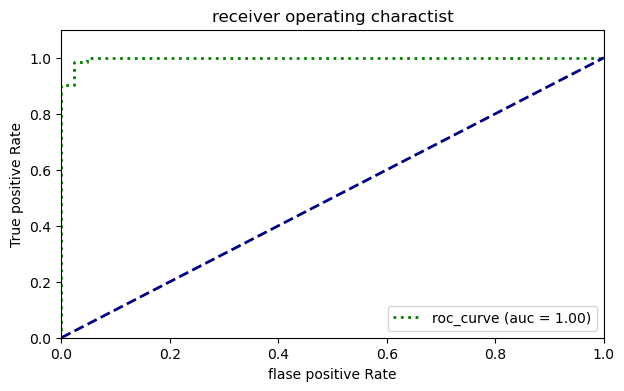

In [32]:
plt.figure(figsize=(7,4))
plt.plot(fpr,tpr,color="green",lw=2,linestyle = ":",label = f'roc_curve (auc = {roc_auc_sco:.2f})')
plt.plot([0,1],[0,1],color = "navy",lw=2,linestyle = "--")
plt.xlim([0.0 , 1.0])
plt.ylim([0.0 , 1.10])
plt.xlabel("flase positive Rate")
plt.ylabel("True positive Rate")
plt.title("receiver operating charactist")
plt.legend(loc = "lower right")
plt.show()

### multi-classification LOGISTIc REGRESSION

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

from sklearn.preprocessing import StandardScaler,label_binarize
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_auc_score, roc_curve, auc
from sklearn.linear_model import LogisticRegression

from warnings import filterwarnings
filterwarnings("ignore")

In [36]:
from sklearn.datasets import load_iris

In [37]:
df = load_iris()

In [38]:
dir(df)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [39]:
data = pd.DataFrame(data = df.data,columns=df.feature_names)

In [40]:
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [41]:
data["target"]=df.target

In [42]:
data["species"] = data.target.apply(lambda x:df.target_names[x])

In [43]:
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [44]:
data.shape

(150, 6)

In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int32  
 5   species            150 non-null    object 
dtypes: float64(4), int32(1), object(1)
memory usage: 6.6+ KB


In [46]:
data.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [47]:
data=data.drop(["target"],axis=1)

In [40]:
data.describe(include="object")

,species
count,150
unique,3
top,setosa
freq,50


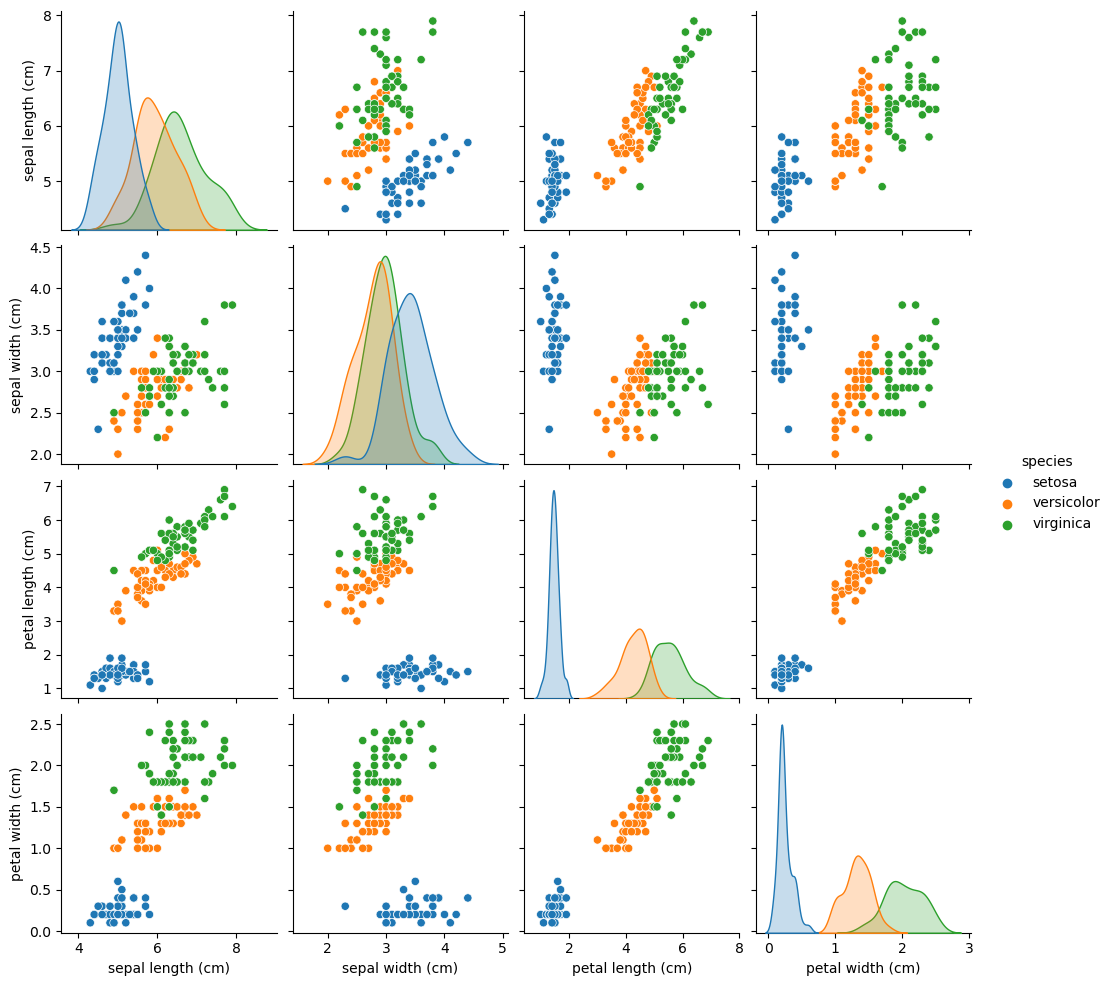

In [41]:
sn.pairplot(data,hue="species")
plt.show()

In [42]:
x=data.drop(["species"],axis=1)
y=data["species"]

In [43]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [44]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [45]:
model = LogisticRegression(max_iter=1000)

In [46]:
model.fit(x_train,y_train)

LogisticRegression(max_iter=1000)

In [47]:
y_pred_train = model.predict(x_train)
class_report = classification_report(y_train,y_pred_train)
print("classification_report: ")
print(class_report)

classification_report: 
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        40
  versicolor       0.97      0.93      0.95        41
   virginica       0.93      0.97      0.95        39

    accuracy                           0.97       120
   macro avg       0.97      0.97      0.97       120
weighted avg       0.97      0.97      0.97       120



In [48]:
y_pred_test = model.predict(x_test)
class_report = classification_report(y_test,y_pred_test)
print("classification_report: ")
print(class_report)

classification_report: 
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [49]:
confu_matrix = confusion_matrix(y_test,y_pred_test)
print("confusion_matrix:")
confu_matrix

confusion_matrix:


array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

Text(0.5, 1.0, 'confusion Matrix')

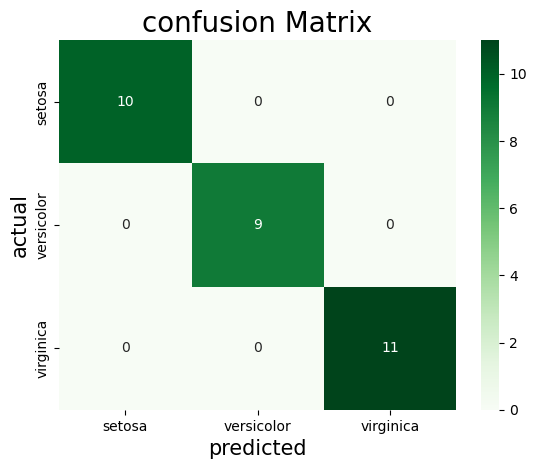

In [50]:
sn.heatmap(confu_matrix,annot=True,cmap = "Greens",xticklabels = data["species"].unique(),yticklabels = data["species"].unique())
plt.xlabel("predicted",fontdict={"fontsize":15})
plt.ylabel("actual",fontdict={"fontsize":15})
plt.title("confusion Matrix",fontdict={"fontsize":20})

In [51]:
y_test_bin = label_binarize(y_test, classes=[0,1,2])
n_classes = y_test_bin.shape[1]
n_classes

3

In [53]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], model.predict_proba(x_test)[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

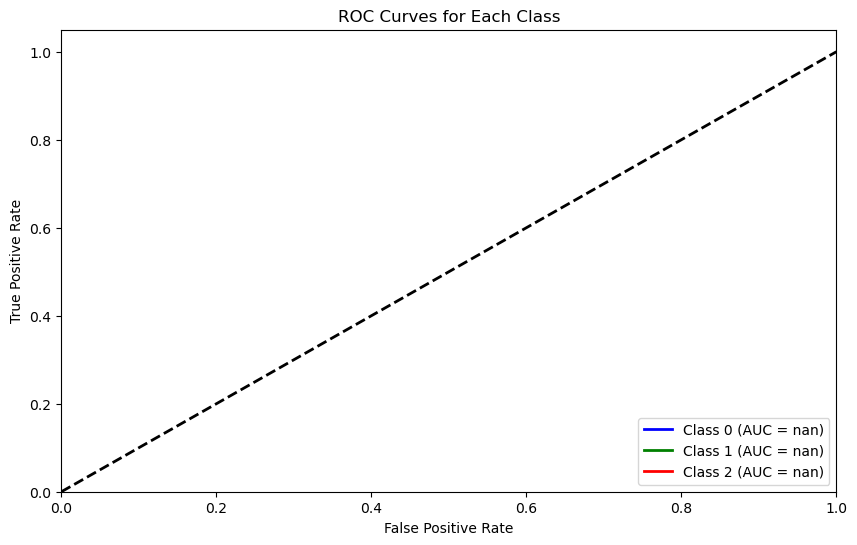

In [54]:
# Plot ROC curves for each class
plt.figure(figsize=(10, 6))
colors = ['blue', 'green', 'red']

for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])    
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')  
plt.title('ROC Curves for Each Class')    
plt.legend(loc="lower right")  
plt.show()

### round 2 binary classification

In [3]:
# Load the dataset
data = pd.read_csv(r"C:\Users\admin\Downloads\breast_cancer_data.csv")
data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [4]:
data.shape

(569, 31)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [6]:
data.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


Text(0.5, 1.0, 'visualizing the non null values')

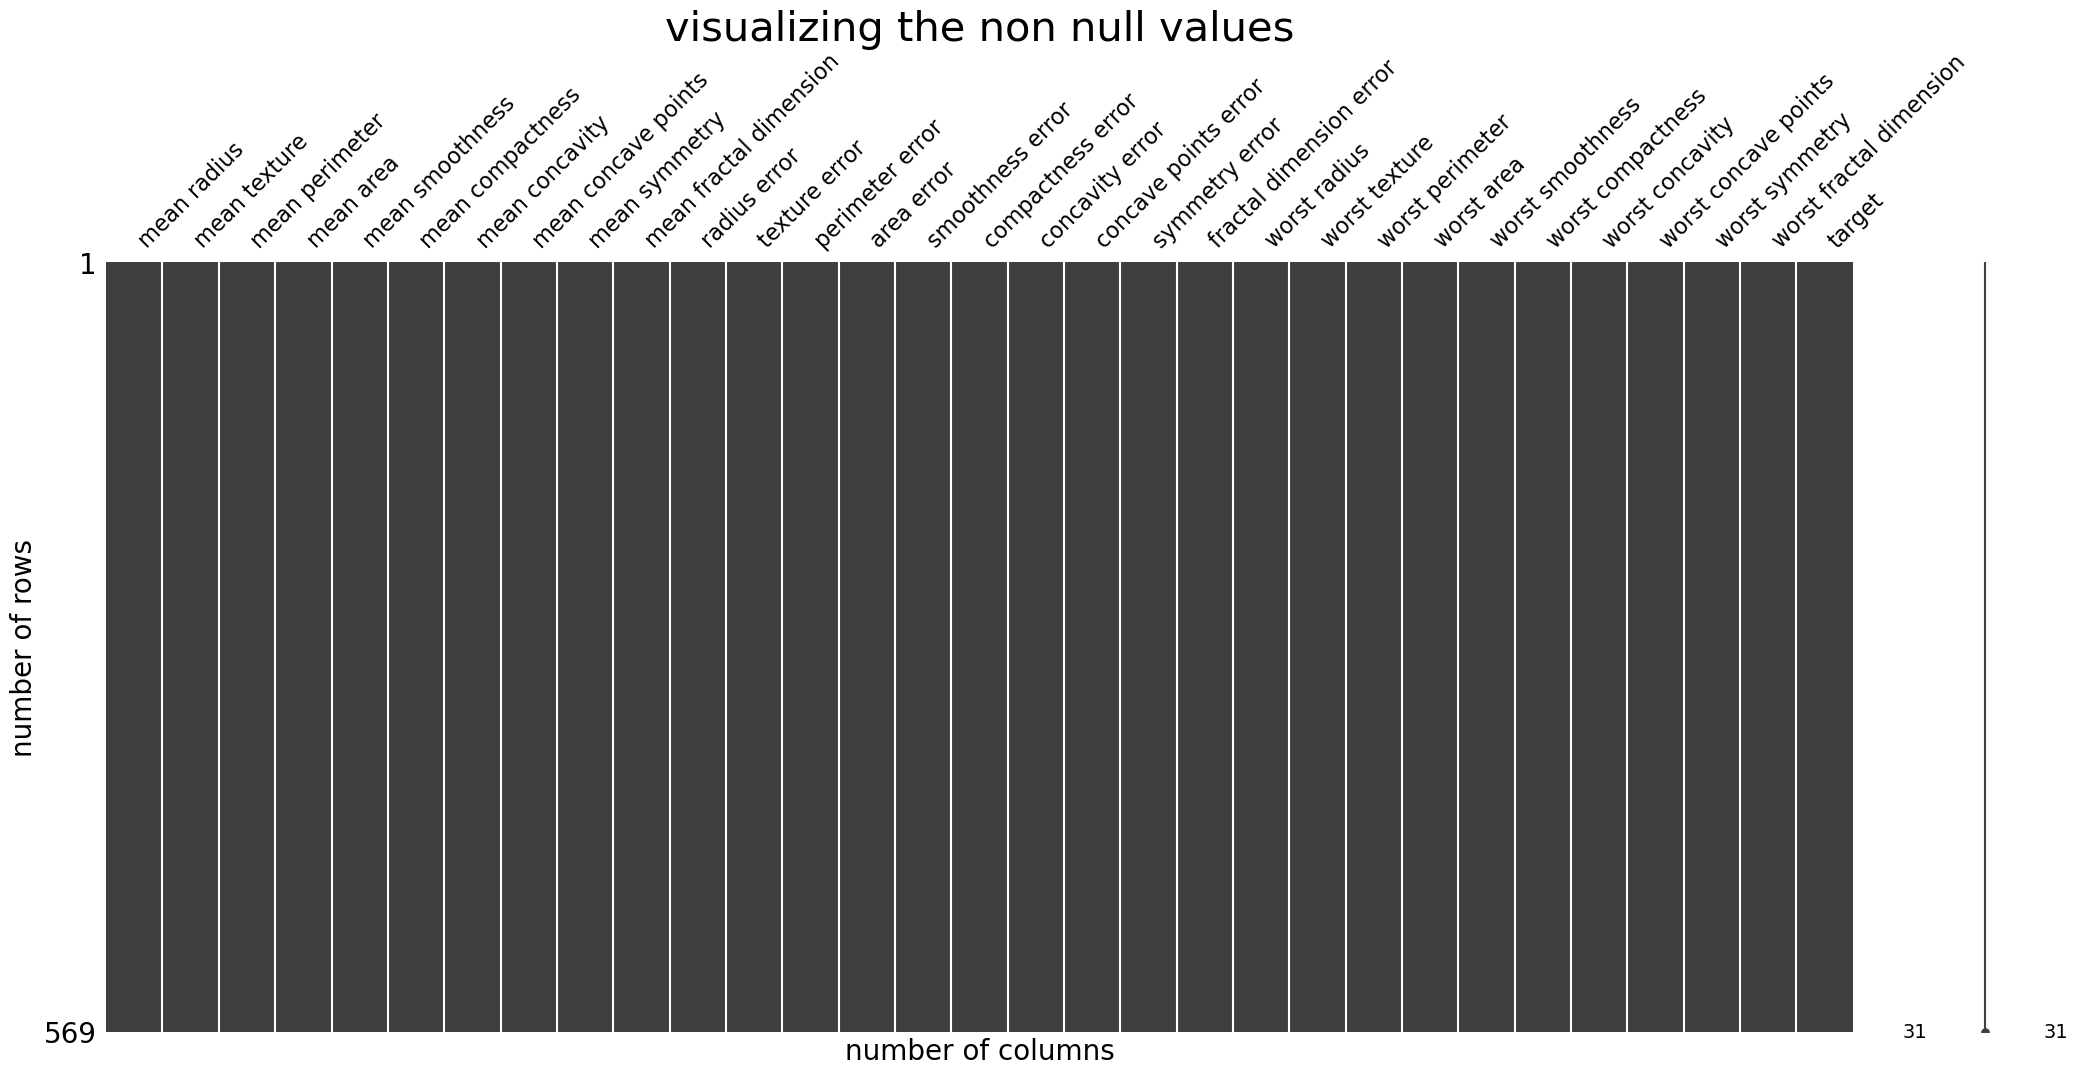

In [7]:
import missingno as mn
mn.matrix(data)
plt.xlabel("number of columns",fontdict={"fontsize":20})
plt.ylabel("number of rows",fontdict={"fontsize":20})
plt.title("visualizing the non null values",fontdict={"fontsize":30})

In [8]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


In [9]:
missing = data.isnull().sum().sort_values(ascending = False)
percent = data.isnull().sum()*100 / data.isnull().count().sort_values(ascending=False)

missing_data = pd.concat([missing,percent],axis=1,keys=["missing","percent"])
missing_data

,missing,percent
mean radius,0,0.0
concavity error,0,0.0
worst fractal dimension,0,0.0
worst symmetry,0,0.0
worst concave points,0,0.0
worst concavity,0,0.0
worst compactness,0,0.0
worst smoothness,0,0.0
worst area,0,0.0
worst perimeter,0,0.0


In [10]:
x = data.drop(["target"],axis=1)
y = data.target

In [11]:
y.value_counts()

target
1    357
0    212
Name: count, dtype: int64

In [12]:
yy = y.value_counts().reset_index()
yy

,target,count
0,1,357
1,0,212


<Axes: ylabel='count'>

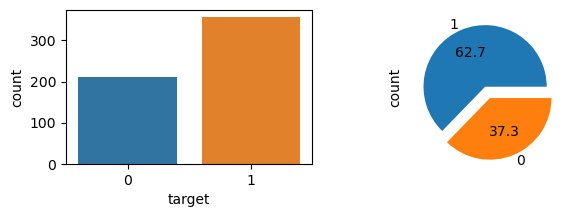

In [13]:
plt.figure(figsize=(7,2))
plt.subplot(1,2,1)
sn.barplot(data=yy,x="target",y="count")
plt.subplot(1,2,2)
data.target.value_counts().plot(kind="pie",autopct="%.1f",explode = [0,0.2])

In [14]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [15]:
scaler = StandardScaler()

In [16]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [17]:
x_train.shape,x_test.shape

((455, 30), (114, 30))

In [18]:
y_train.shape,y_test.shape

((455,), (114,))

In [19]:
model = LogisticRegression(random_state = 42)  
model.fit(x_train,y_train)

LogisticRegression(random_state=42)

In [20]:
y_pred_test = model.predict(x_test)
acc_test = accuracy_score(y_test,y_pred_test)
acc_test

0.9649122807017544

In [21]:
y_pred_train = model.predict(x_train)
acc_train = accuracy_score(y_train,y_pred_train)
acc_train    

0.989010989010989

<Axes: >

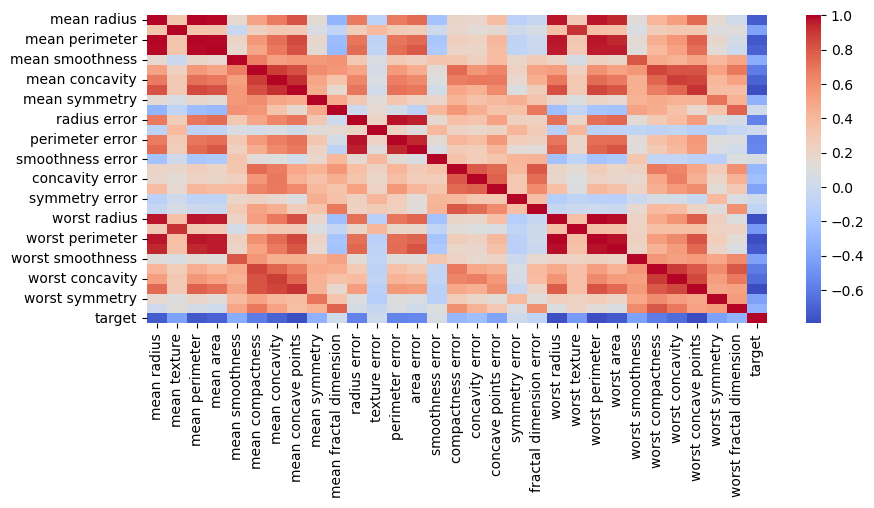

In [22]:
plt.figure(figsize=(10,4))
corr_matrix = data.corr()
sn.heatmap(corr_matrix,annot=False,cmap="coolwarm")

In [23]:
conf = confusion_matrix(y_test,y_pred_test)
conf

array([[37,  2],
       [ 2, 73]], dtype=int64)

In [24]:
class_report = classification_report(y_test,y_pred_test)
print(class_report)

              precision    recall  f1-score   support

           0       0.95      0.95      0.95        39
           1       0.97      0.97      0.97        75

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114



In [25]:
y_pred_proba = model.predict_proba(x_test)[:,1]
roc_auc = roc_auc_score(y_test,y_pred_proba)
fpr , tpr , _ = roc_curve(y_test,y_pred_proba)

In [26]:
fpr,tpr

(array([0.        , 0.        , 0.        , 0.02564103, 0.02564103,
        0.05128205, 0.05128205, 0.07692308, 0.07692308, 1.        ]),
 array([0.        , 0.01333333, 0.88      , 0.88      , 0.89333333,
        0.89333333, 0.98666667, 0.98666667, 1.        , 1.        ]))

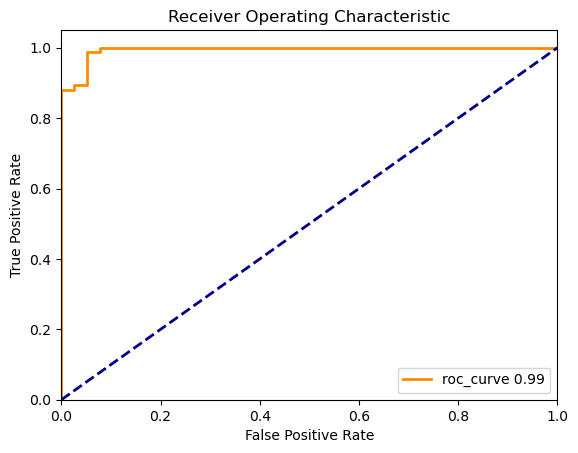

In [30]:
plt.figure()
plt.plot(fpr,tpr,color = "darkorange",lw=2,label = f"roc_curve {roc_auc:.2f}")
plt.plot([0,1],[0,1],color="darkblue",lw=2,linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

In [31]:
# Multi class classification

In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn


from warnings import filterwarnings
filterwarnings("ignore")

from sklearn.preprocessing import StandardScaler,label_binarize
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,roc_auc_score,roc_curve, auc

In [82]:
from sklearn.datasets import load_iris

In [83]:
iris = load_iris()

In [84]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [85]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [86]:
data = pd.DataFrame(data = iris.data ,columns = iris.feature_names)
data["target"] = iris.target

In [87]:
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [88]:
data["species"] = data["target"].apply(lambda x:iris.target_names[x])

In [89]:
data.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica
149,5.9,3.0,5.1,1.8,2,virginica


In [90]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int32  
 5   species            150 non-null    object 
dtypes: float64(4), int32(1), object(1)
memory usage: 6.6+ KB


In [91]:
data.shape

(150, 6)

In [92]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal length (cm),150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal width (cm),150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
petal length (cm),150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
petal width (cm),150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5
target,150.0,1.000000,0.819232,0.0,0.0,1.00,2.0,2.0


In [93]:
missing = data.isnull().sum().sort_values(ascending=True)
percent = data.isnull().sum()*100/data.isnull().count().sort_values(ascending=True)

miss_data = pd.concat([missing,percent],axis=1,keys=["missing_number","percent_missing"])
miss_data

,missing_number,percent_missing
sepal length (cm),0,0.0
sepal width (cm),0,0.0
petal length (cm),0,0.0
petal width (cm),0,0.0
target,0,0.0
species,0,0.0


In [94]:
data.describe(include="object")

,species
count,150
unique,3
top,setosa
freq,50


In [95]:
data.species.value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

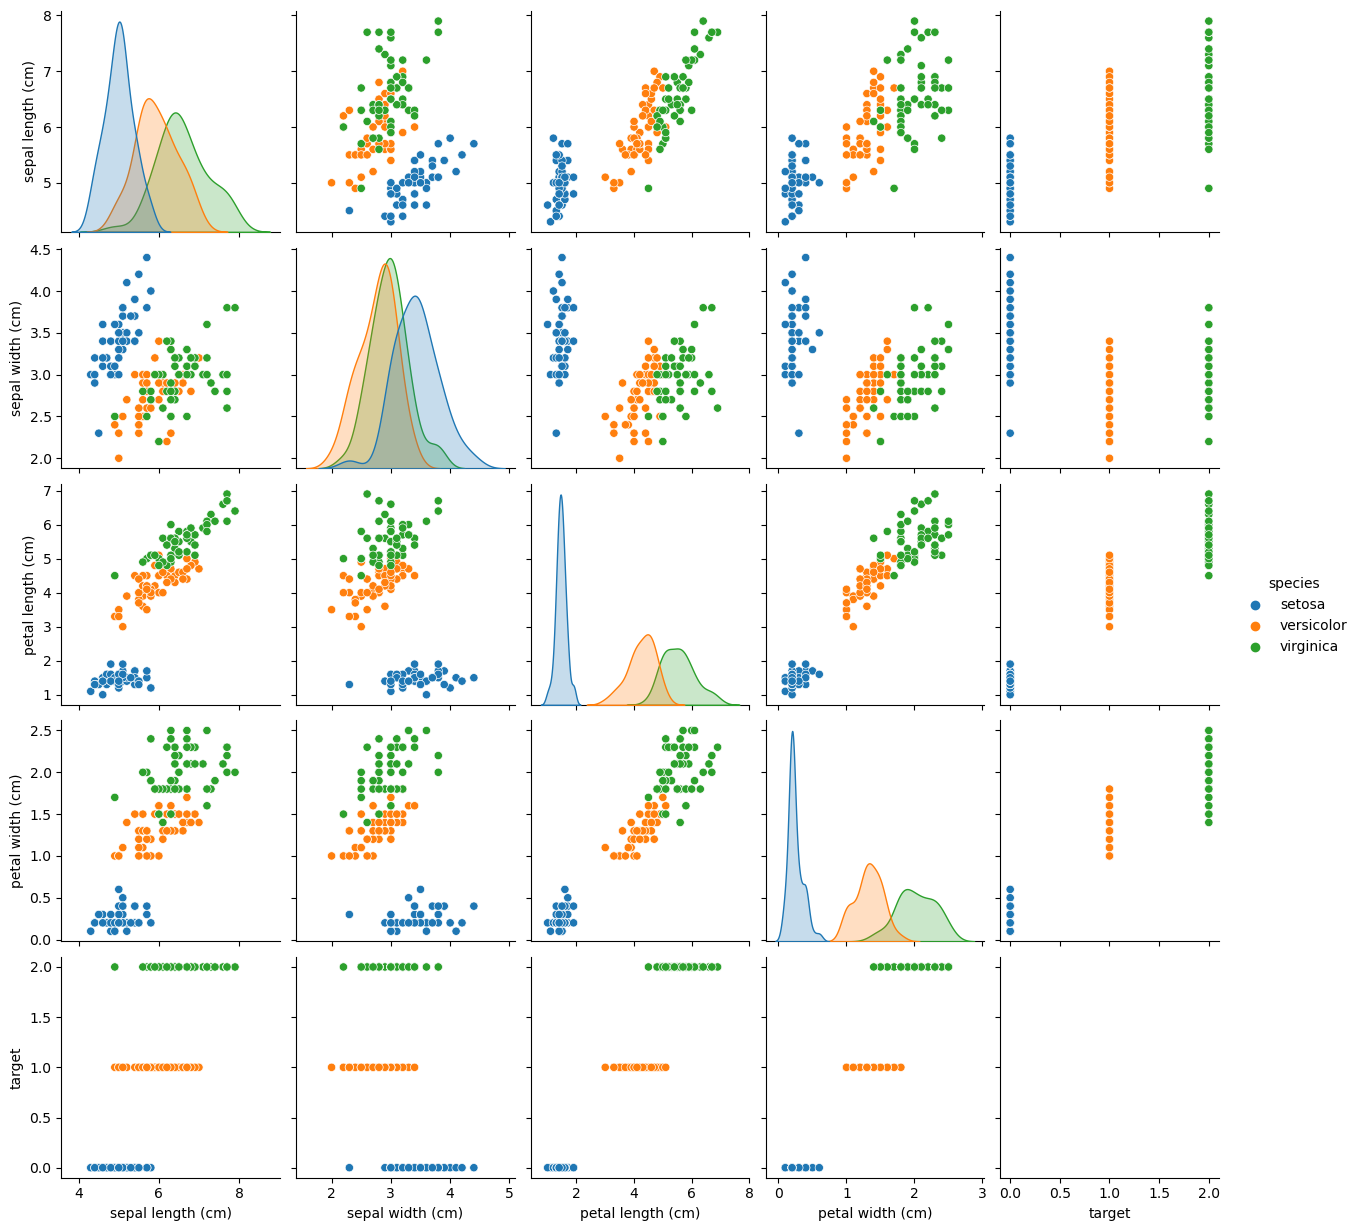

In [96]:
sn.pairplot(data,hue="species")

In [111]:
data = data.sample(data.shape[0])
data=data.reset_index(drop=True)
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,5.6,2.7,4.2,1.3,1,versicolor
1,4.9,3.0,1.4,0.2,0,setosa
2,4.4,2.9,1.4,0.2,0,setosa
3,4.8,3.0,1.4,0.1,0,setosa
4,6.8,3.0,5.5,2.1,2,virginica
...,...,...,...,...,...,...
145,6.0,2.2,5.0,1.5,2,virginica
146,5.1,3.3,1.7,0.5,0,setosa
147,5.5,4.2,1.4,0.2,0,setosa
148,4.5,2.3,1.3,0.3,0,setosa


In [160]:
x = data.drop(["species","target"],axis=1)
y = data.species
y

0      versicolor
1          setosa
2          setosa
3          setosa
4       virginica
          ...    
145     virginica
146        setosa
147        setosa
148        setosa
149        setosa
Name: species, Length: 150, dtype: object

In [161]:
# encode the categorical data into integer like (sentosa,versicolor,viriginca) ---> (0,1,2)
encode_y= pd.factorize(y)
encode_y

(array([0, 1, 1, 1, 2, 0, 1, 2, 2, 0, 0, 2, 0, 1, 1, 1, 1, 2, 0, 0, 2, 2,
        0, 2, 0, 2, 2, 0, 2, 0, 0, 2, 0, 1, 0, 0, 1, 0, 1, 0, 2, 2, 2, 0,
        1, 1, 2, 2, 1, 1, 1, 2, 0, 0, 1, 1, 0, 2, 1, 2, 2, 0, 1, 0, 2, 0,
        2, 0, 2, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 2, 1, 2, 2, 0, 0, 0, 0,
        0, 2, 0, 2, 2, 2, 2, 0, 1, 1, 1, 0, 1, 2, 0, 1, 1, 2, 2, 2, 1, 1,
        1, 0, 2, 2, 2, 1, 1, 0, 1, 1, 2, 0, 2, 2, 0, 1, 2, 0, 0, 1, 1, 2,
        0, 0, 0, 2, 2, 1, 1, 0, 2, 2, 1, 1, 2, 2, 1, 1, 1, 1], dtype=int64),
 Index(['versicolor', 'setosa', 'virginica'], dtype='object'))

In [162]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [163]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test =  scaler.transform(x_test)

In [164]:
model = LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [165]:
y_pred_train= model.predict(x_train)

In [166]:
class_report = classification_report(y_train,y_pred_train)
print(class_report)

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        38
  versicolor       0.97      0.95      0.96        41
   virginica       0.95      0.98      0.96        41

    accuracy                           0.97       120
   macro avg       0.98      0.98      0.98       120
weighted avg       0.98      0.97      0.97       120



In [167]:
y_pred_test = model.predict(x_test)

In [168]:
class_report = classification_report(y_test,y_pred_test)
print(class_report)

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        12
  versicolor       0.90      1.00      0.95         9
   virginica       1.00      0.89      0.94         9

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.96        30
weighted avg       0.97      0.97      0.97        30



In [169]:
confu_matrix = confusion_matrix(y_test,y_pred_test)
print(confu_matrix)

[[12  0  0]
 [ 0  9  0]
 [ 0  1  8]]


Text(20.72222222222222, 0.5, 'actual')

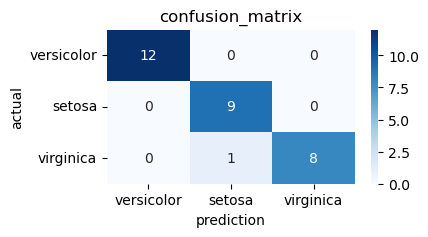

In [170]:
plt.figure(figsize=(4,2))
sn.heatmap(confu_matrix,annot=True,cmap="Blues",xticklabels=data["species"].unique(),yticklabels=data["species"].unique())
plt.title("confusion_matrix")
plt.xlabel("prediction")
plt.ylabel("actual")

In [171]:
# roc_auc and roc_curve

In [183]:
#binarize the label for roc curve
y_test_bin = label_binarize(y_test,classes=[0,1,2])
n_class = y_test_bin.shape[1]
n_class

3

In [186]:
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_class):
    fpr[i],tpr[i],_ = roc_curve(y_test_bin[:,i],model.predict_proba(x_test)[:,i])
    roc_auc[i] = auc(fpr[i],tpr[i])

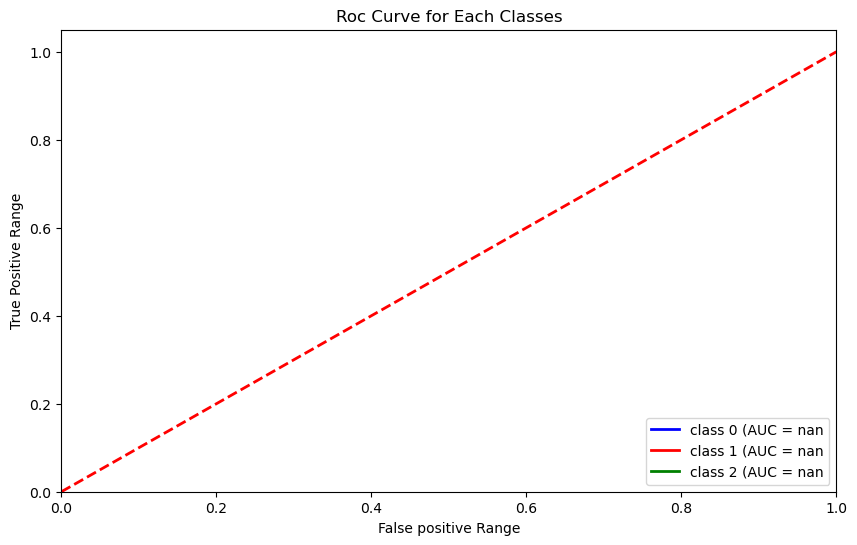

In [198]:
plt.figure(figsize=(10,6))
colors= ["blue","red","green"]

for i,color in zip(range(n_class),colors):
    plt.plot(fpr[i],tpr[i],lw=2,linestyle="-",color=color,label=f"class {i} (AUC = {roc_auc[i]:.2f}")
    
plt.plot([0,1],[0,1],lw=2,linestyle="--",color="red")
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("False positive Range")
plt.ylabel("True Positive Range")
plt.title("Roc Curve for Each Classes")
plt.legend(loc="lower right")
plt.show()

In [202]:
y_test_bin = label_binarize(y_test,classes=[0,1,2])
n_class = y_test_bin.shape[1]
n_class

3

In [203]:
fpr=dict()
tpr=dict()
roc_auc=dict()

for i in range(n_class):
    fpr[i],tpr[i],_ = roc_curve(y_test_bin[:,i],model.predict_proba(x_test)[:,i])
    roc_auc = auc(fpr[i],tpr[i])

Text(0.5, 1.0, 'roc curve for all classes')

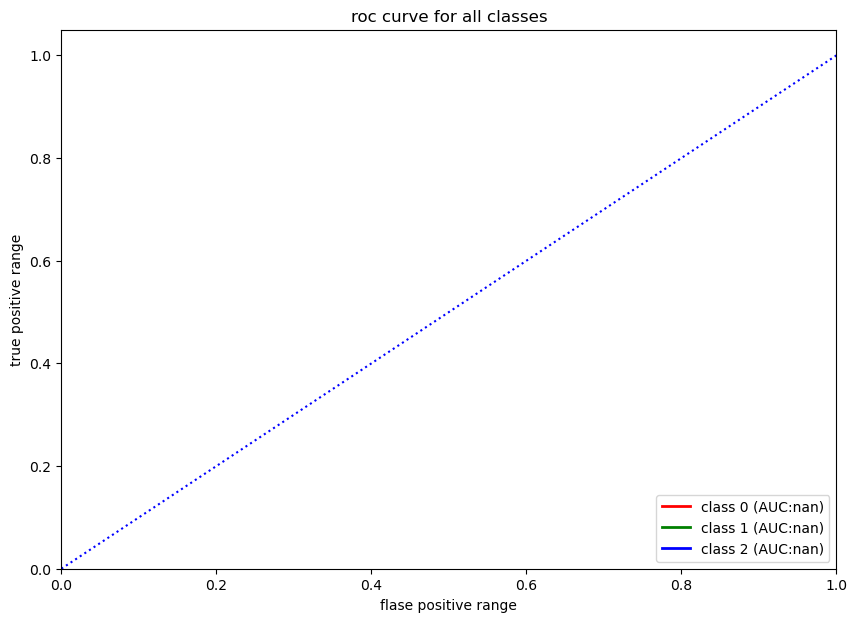

In [213]:
plt.figure(figsize=(10,7))
color = ["red","green","blue"]

for i,color in zip(range(n_class),color):
    plt.plot(fpr[i],tpr[i],lw=2,linestyle="-",color=color,label=f"class {i} (AUC:{roc_auc[i]:.2f})")

plt.plot([0,1],[0,1],linestyle=":",color="blue")
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.legend(loc="lower right")
plt.xlabel("flase positive range")
plt.ylabel("true positive range")
plt.title("roc curve for all classes")